In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
target_encode = {
    "0": "T-shirt/top",
    "1": "Trouser",
    "2": "Pullover",
    "3": "Dress",
    "4": "Coat",
    "5": "Sandal",
    "6": "Shirt",
    "7": "Sneaker",
    "8": "Bag",
    "9": "Ankle boot"
}

class_names = [target_encode.get(key) for key in sorted(target_encode.keys())]

In [28]:
# 60_000 picture of 28x28 pixels
train_images.shape

(60000, 28, 28)

In [43]:
# train_images[7] # picture color scale: 0 to 255

# array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
#           0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
#           0,   0],
#        [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
#         255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
#           0,   0],
#        [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
#         221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
#           0,   0],
# ...
#           0,   0,   0,   0,   0,   0,   0,   4,   0, 103, 246, 247,  72,
#           0,   0],
#        [  0,   0,   0,   1,  95,  77,  52,   0,   4,   0,   0,   0,   0,
#           0,   0,   0,   0,   0,   0,   0,   3,   0,  82, 237, 231,  70,
#           0,   0]], dtype=uint8)

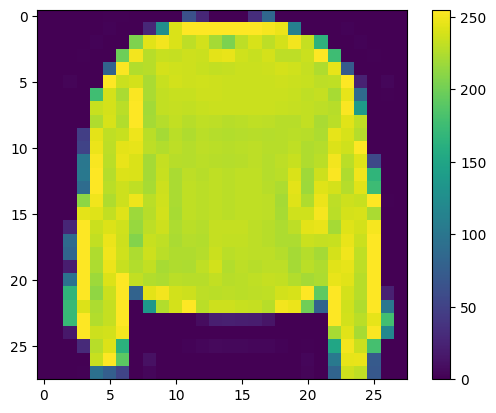

In [39]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [44]:
train_images_preprocess = train_images / 255

# test set should be treated the same
test_images_preprocess = test_images / 255

In [46]:
# train_images_preprocess[7] # picture color scale: 0 to 1

# array([[0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
#         0.        , 0.24705882, 0.10980392, 0.        , 0.        ,
#         0.        , 0.12941176, 0.33333333, 0.        , 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.        ],
# ...
#         0.30196078, 0.20392157, 0.        , 0.01568627, 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.01176471, 0.        , 0.32156863, 0.92941176, 0.90588235,
#         0.2745098 , 0.        , 0.        ]])

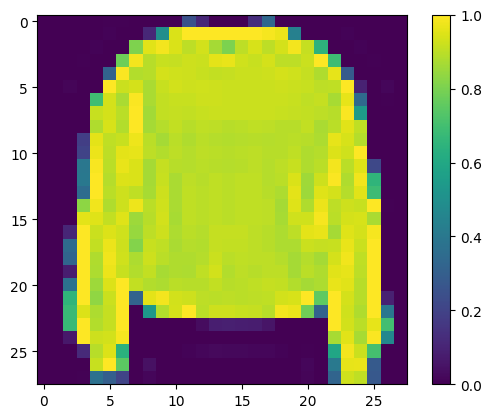

In [49]:
plt.plot()
plt.imshow(train_images_preprocess[7])
plt.colorbar()
plt.show()

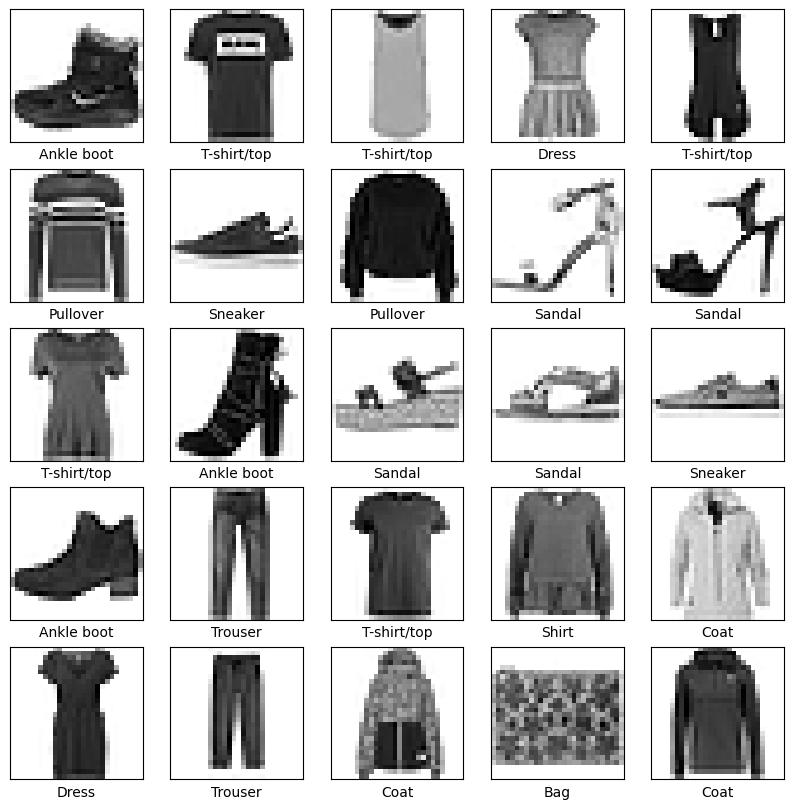

In [54]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_preprocess[i], cmap=plt.cm.binary)
    plt.xlabel(target_encode.get(str(train_labels[i])))

In [68]:
# create NN model instance
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10)
    ]
)

c:\Users\HP\Desktop\ken\Project\Project ML\pyenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
# Model Setting
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [70]:
# model.fit(train_images_preprocess, train_labels)
model.fit(train_images_preprocess, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7854 - loss: 0.6275
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3847
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8751 - loss: 0.3446
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8851 - loss: 0.3148
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8906 - loss: 0.2961


In [67]:
test_loss, test_acc =model.evaluate(test_images_preprocess, test_labels)
print(f"\nTest Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8854 - loss: 0.3834

Test Accuracy: 0.88919997215271


In [ ]:
# Add Softmax
probability_model = tf.keras.Sequential(
    [model, tf.keras.layers.Softmax()]
)

In [73]:
predictions = probability_model.predict(test_images_preprocess)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [75]:
predictions[0]

array([1.1607040e-05, 1.7149829e-10, 1.9453032e-06, 1.8591216e-08,
       2.5907590e-07, 2.6929392e-02, 2.1580076e-06, 7.8404017e-02,
       1.1764828e-04, 8.9453298e-01], dtype=float32)

In [77]:
np.argmax(predictions[0])

9

In [79]:
test_labels[0]

9

In [78]:
target_encode.get(str(np.argmax(predictions[0])))

'Ankle boot'

In [80]:
# plot
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

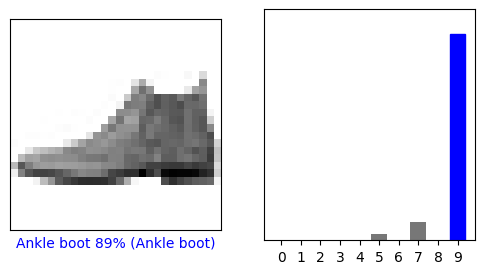

In [81]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

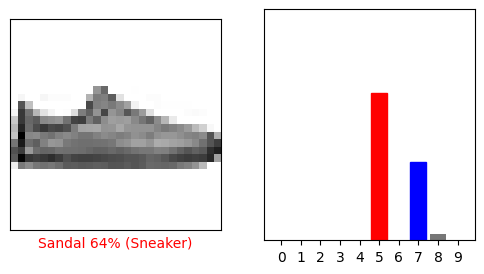

In [82]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

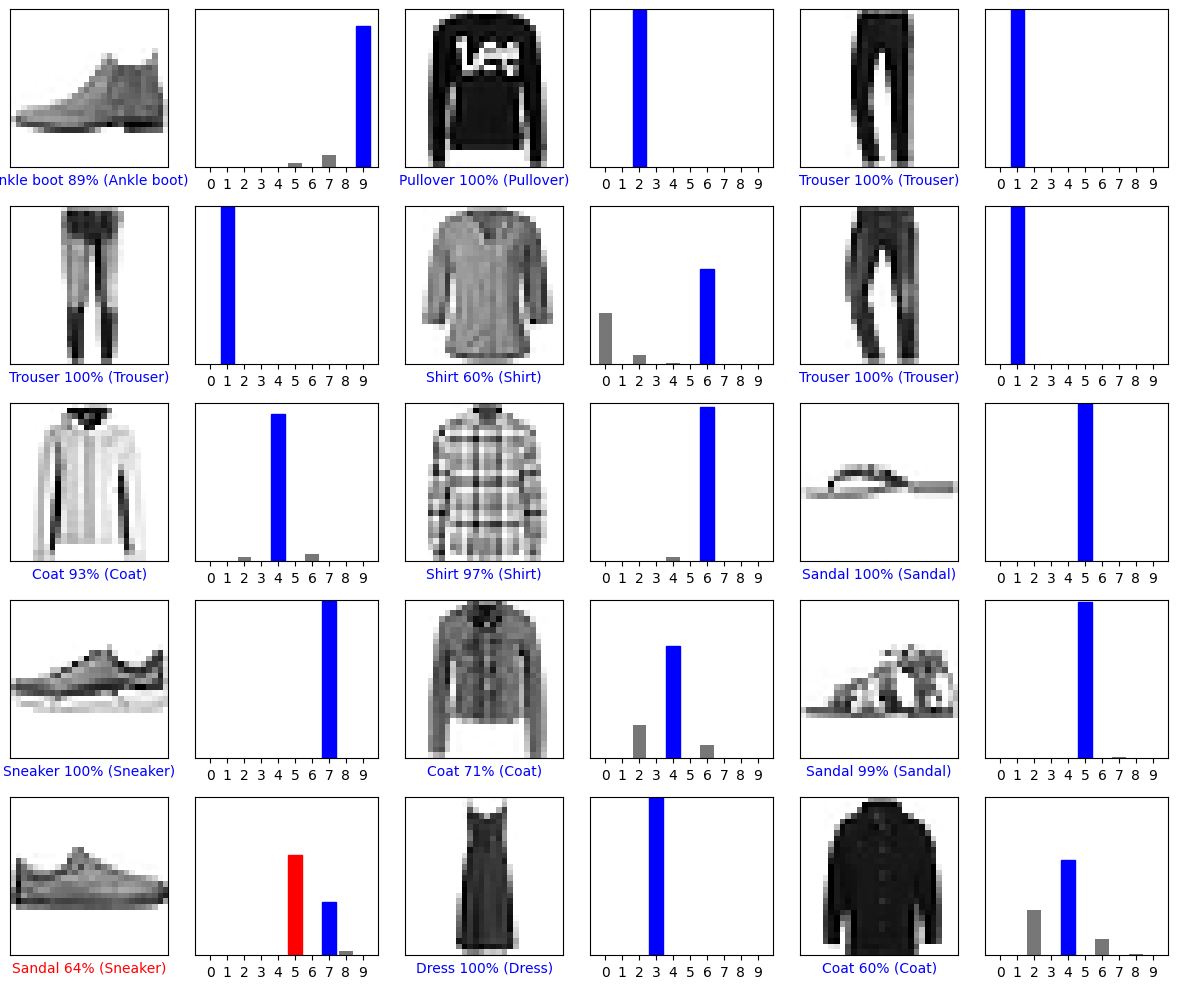

In [83]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Predict a single image

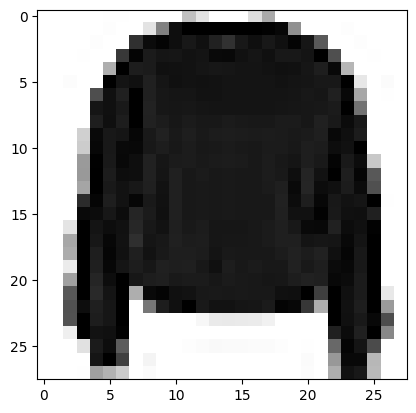

In [86]:
plt.imshow(train_images[7], cmap=plt.cm.binary)

In [87]:
img = train_images[7]
img.shape

(28, 28)

In [89]:
# Convert to the same dimension as model training dataset
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [90]:
single_pred = probability_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [98]:
target_encode

{'0': 'T-shirt/top',
 '1': 'Trouser',
 '2': 'Pullover',
 '3': 'Dress',
 '4': 'Coat',
 '5': 'Sandal',
 '6': 'Shirt',
 '7': 'Sneaker',
 '8': 'Bag',
 '9': 'Ankle boot'}

In [97]:
single_pred

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [96]:
# target label
target_encode.get(
    str(train_labels[7])
)

'Pullover'

In [93]:
# prediction
target_encode.get(
    str(np.argmax(single_pred))
)

'Coat'

---